# Project 8 - Y.Afisha

## 1 - Importing Libraries

In [15]:
import pandas as pd
import numpy as np               
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns            
from scipy import stats
from IPython.display import display

## 2 - Loading Data

In [16]:
costs = pd.read_csv('../data/costs_us.csv')
orders = pd.read_csv('../data/orders_log_us.csv')
visits = pd.read_csv('../data/visits_log_us.csv')

## 3 - Data Description


The visits dataframe (server logs with data about website visits):

uid — unique user identifier.
device — user's device.  
start_ts — date and time of the session start.  
end_ts — date and time of the session end.  
source_id — identifier of the ad source through which the user arrived.  

The orders dataframe (data about orders):

uid — unique identifier of the user placing an order.  
buy_ts — date and time of the order.  
revenue — Y.Afisha's revenue from the order.  

The costs dataframe (data about marketing expenses):  

source_id — identifier of the ad source through which the user arrived.  
Dt — date.  
Costs — expenses for this ad source on this day.

## 4 - Preparing the Data

### 4.1 - Visits Dataframe

#### 4.1.1 - Checking for null values, missing values, data types, and Dataframe size

In [17]:
visits.info()
display(visits.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


#### 4.1.2 - Checking the contents of the ‘Device’ and ‘Source Id’ columns of the Dataframe

In [18]:
print(visits['Device'].value_counts())
print(visits['Source Id'].value_counts())

desktop    262567
touch       96833
Name: Device, dtype: int64
4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: Source Id, dtype: int64


#### 4.1.3 - Changing data type, applying to lower and replace

In [19]:
# Changing the data type of the Device column
visits['Device']=visits['Device'].astype('category')
# Changing the data type of the Source Id column
visits['Source Id'] = visits['Source Id'].astype('category')
# Changing the data type of the End Ts column
visits['End Ts']=pd.to_datetime(visits['End Ts'])
# Changing the data type of the Start Ts column
visits['Start Ts']=pd.to_datetime(visits['Start Ts'])
# Converting all column names to lowercase and replacing spaces with underscores
visits.columns=visits.columns.str.lower().str.replace(' ','_')

#### 4.1.4 - Let's create a column for the day, week, and month of the start and end dates of the visits.


In [20]:
visits['start_day'] = visits['start_ts'].dt.day
visits['start_week'] = visits['start_ts'].dt.isocalendar().week
visits['start_month'] = visits['start_ts'].dt.month
visits['end_day'] = visits['end_ts'].dt.day
visits['end_week'] = visits['end_ts'].dt.isocalendar().week
visits['end_month'] = visits['end_ts'].dt.month

#### 4.1.5 - Now let's change the type of columns created so that the dataframe doesn't become too heavy.


In [21]:
visits['start_day'] = visits['start_day'].astype('int8')
visits['start_week'] = visits['start_week'].astype('int8')
visits['start_month'] = visits['start_month'].astype('int8')
visits['end_day'] = visits['end_day'].astype('int8')
visits['end_week'] = visits['end_week'].astype('int8')
visits['end_month'] = visits['end_month'].astype('int8')

#### 4.1.6 - Final verification

In [22]:
print(visits.info())
display(visits.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   device       359400 non-null  category      
 1   end_ts       359400 non-null  datetime64[ns]
 2   source_id    359400 non-null  category      
 3   start_ts     359400 non-null  datetime64[ns]
 4   uid          359400 non-null  uint64        
 5   start_day    359400 non-null  int8          
 6   start_week   359400 non-null  int8          
 7   start_month  359400 non-null  int8          
 8   end_day      359400 non-null  int8          
 9   end_week     359400 non-null  int8          
 10  end_month    359400 non-null  int8          
dtypes: category(2), datetime64[ns](2), int8(6), uint64(1)
memory usage: 11.0 MB
None


,device,end_ts,source_id,start_ts,uid,start_day,start_week,start_month,end_day,end_week,end_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,20,51,12,20,51,12
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,19,8,2,19,8,2
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,1,26,7,1,26,7
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,20,20,5,20,20,5
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,27,52,12,27,52,12


### 4.2 - Dataframe Orders

#### 4.2.1 - Checking for null values, missing values, data types, and Dataframe size

In [23]:
orders.info()
display(orders.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


#### 4.2.2 - Changing data type, applying to lower and replace

In [24]:
# Changing the data type of the Buy TS column
orders['Buy Ts']=pd.to_datetime(orders['Buy Ts'])
# Changing the data type of the Revenue column to reduce the dataframe size
orders['Revenue']=orders['Revenue'].astype('float32')
# Converting all column names to lowercase and replacing spaces with underscores
orders.columns=orders.columns.str.lower().str.replace(' ', '_')

#### 4.2.3 - Final verification

In [25]:
orders.info()
display(orders.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float32       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float32(1), uint64(1)
memory usage: 984.8 KB


,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


### 4.3 - Dataframe Costs

#### 4.3.1 - Checking for null values, missing values, data types, and Dataframe size

In [26]:
costs.info()
display(costs.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


#### 4.3.2 - Checking the contents of the ‘source_id’ column of the Dataframe

In [27]:
# Checking the contents of the ‘source_id’ column of the Dataframe
print(costs['source_id'].value_counts())

5     364
1     363
2     363
3     363
4     363
9     363
10    363
Name: source_id, dtype: int64


#### 4.3.3 - Changing data type, applying to lower and replace

In [28]:
# Changing the data type of the source_id column
costs['source_id']=costs['source_id'].astype('category')
# Changing the data type of the dt column
costs['dt']=pd.to_datetime(costs['dt'])
# Converting all column names to lowercase and replacing spaces with underscores
costs.columns=costs.columns.str.lower().str.replace(' ', '_')

#### 4.3.4 - Final verification

In [29]:
costs.info()
display(costs.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   category      
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(1)
memory usage: 42.7 KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


## 5 - Reports

### 5.1 - Product

#### 5.1.1 - How many people use it each day?

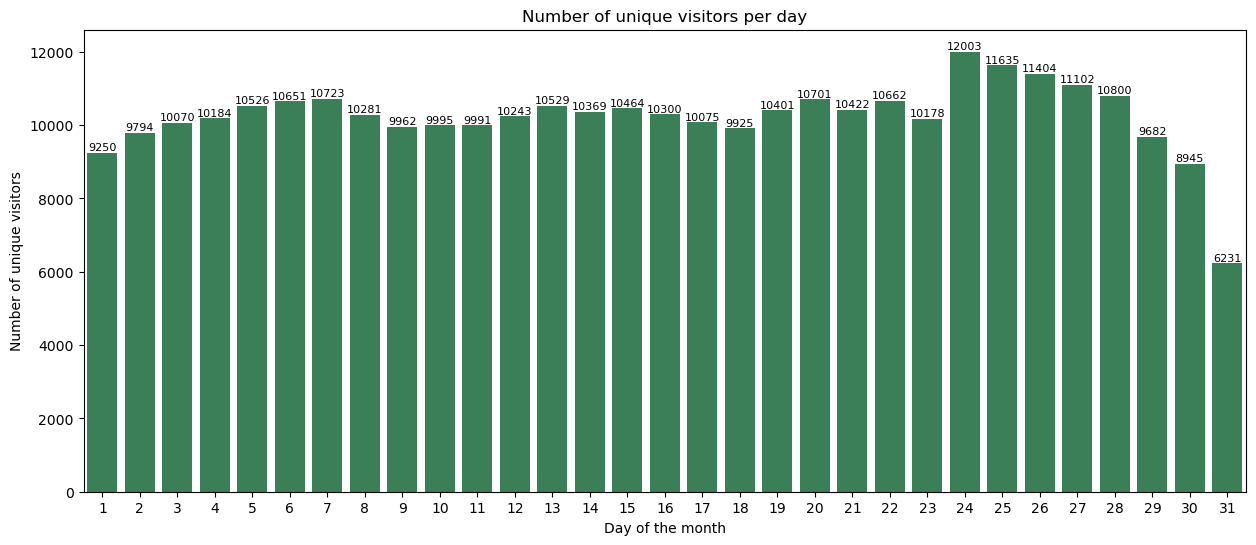

In [30]:
visits_per_day = visits.groupby('start_day')['uid'].nunique().reset_index()

plt.figure(figsize=(15, 6))
ax = sns.barplot(data=visits_per_day, x='start_day', y='uid', color='seagreen')
ax.set_title('Number of unique visitors per day')
ax.set_ylabel('Number of unique visitors') 
ax.set_xlabel('Day of the month')

for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2,bar.get_height(),f'{int(bar.get_height())}',ha='center',va='bottom',fontsize=8)

plt.show()

#### 5.1.2 - How many people use it each week?

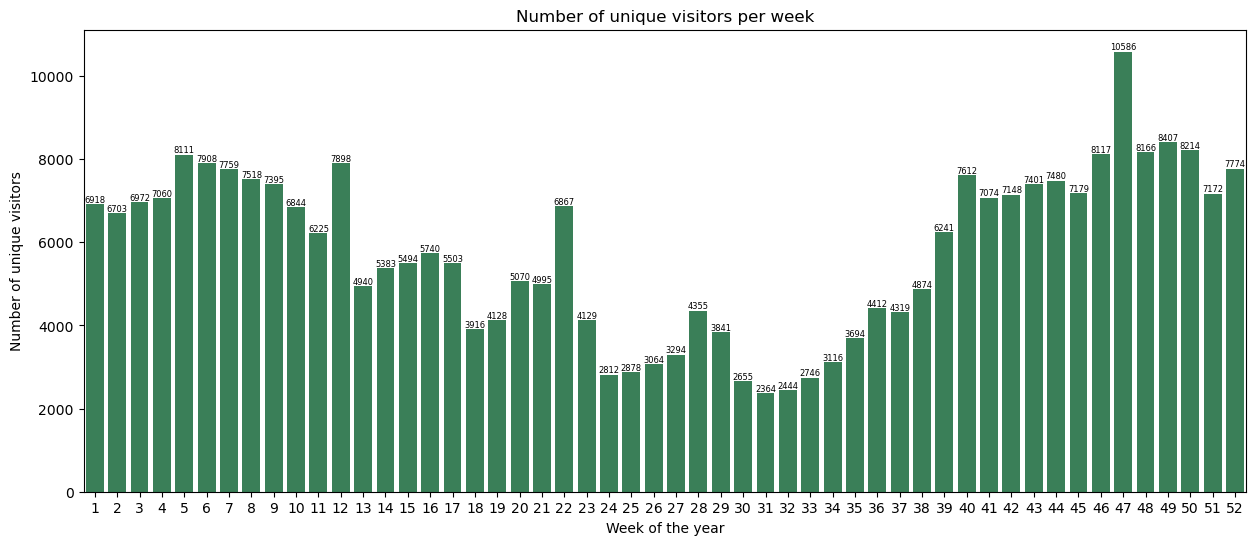

In [31]:
visits_per_week = visits.groupby('start_week')['uid'].nunique().reset_index()

plt.figure(figsize=(15, 6))
ax = sns.barplot(data=visits_per_week, x='start_week', y='uid', color='seagreen')
ax.set_title('Number of unique visitors per week')
ax.set_ylabel('Number of unique visitors') 
ax.set_xlabel('Week of the year')

for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2,bar.get_height(),f'{int(bar.get_height())}',ha='center',va='bottom',fontsize=6)

plt.show()

#### 5.1.3 - How many people use it each month?

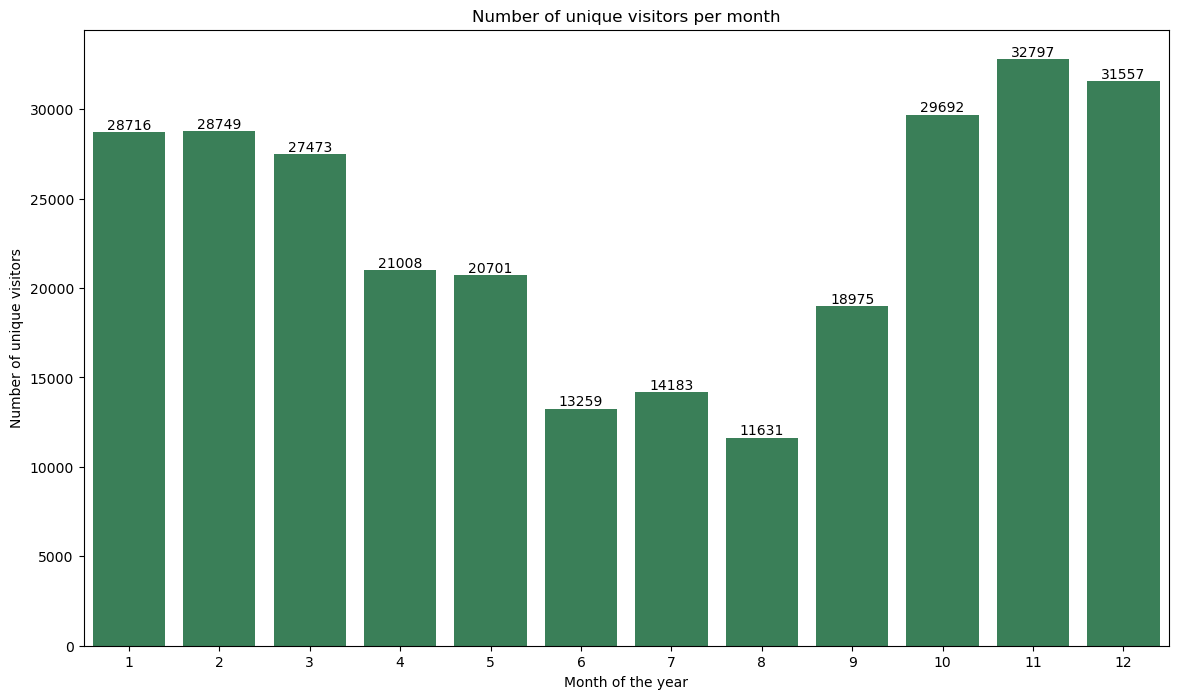

In [32]:
visits_per_month = visits.groupby('start_month')['uid'].nunique().reset_index()

plt.figure(figsize=(14, 8))
ax = sns.barplot(data=visits_per_month, x='start_month', y='uid', color='seagreen')
ax.set_title('Number of unique visitors per month')
ax.set_ylabel('Number of unique visitors') 
ax.set_xlabel('Month of the year')

for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2,bar.get_height(),f'{int(bar.get_height())}',ha='center',va='bottom',fontsize=10)

plt.show()

#### 5.1.4 - How many sessions occur per day (a user can perform multiple sessions).

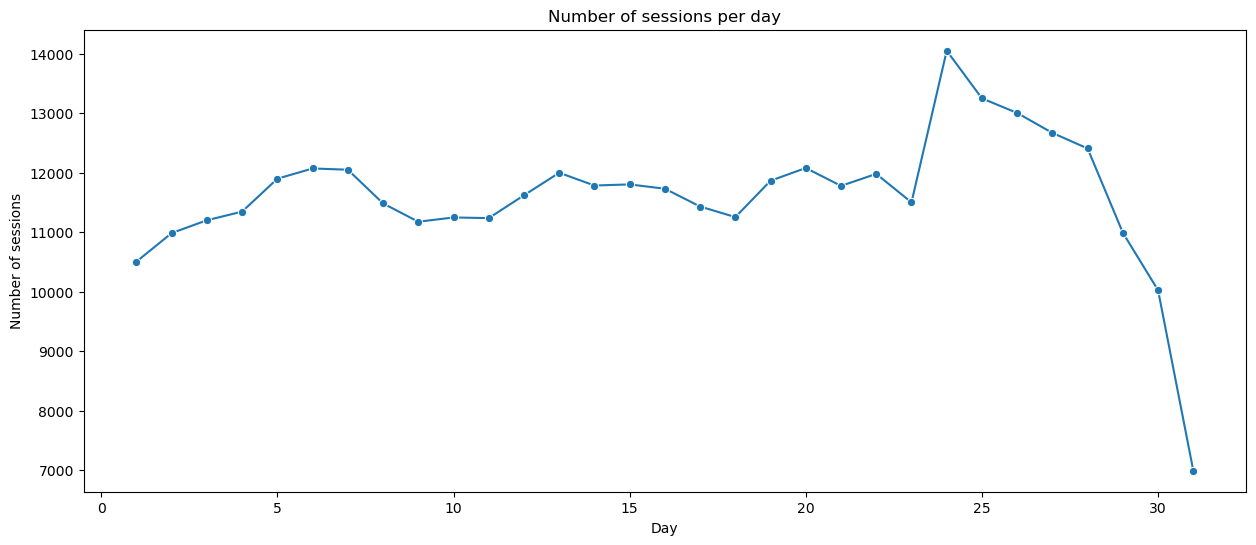

In [33]:
sessions_per_day = (visits.groupby('start_day').size().reset_index(name='sessions'))

plt.figure(figsize=(15, 6))
ax = sns.lineplot(data=sessions_per_day, x='start_day', y='sessions', marker='o',)
ax.set_title('Number of sessions per day')
ax.set_ylabel('Number of sessions')
ax.set_xlabel('Day')

plt.show()

#### 5.1.5 - How long is each session?

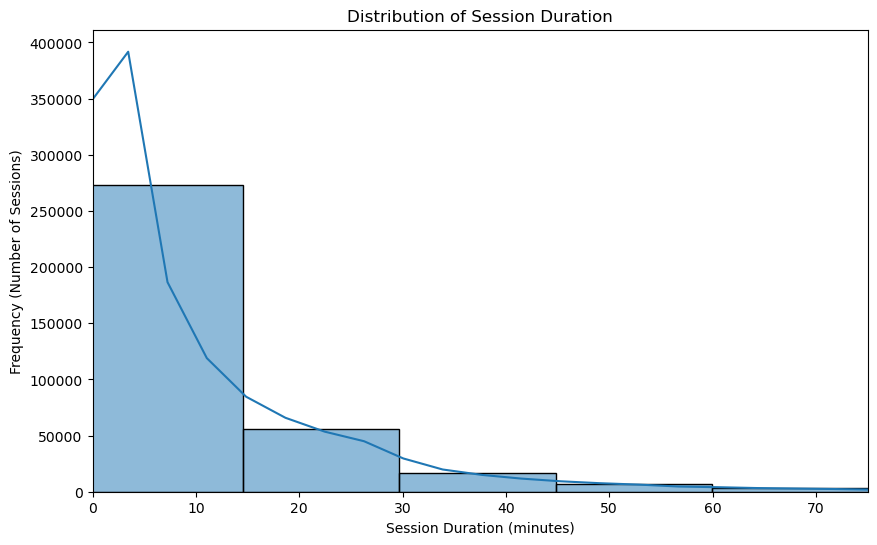

In [34]:
visits['session_duration'] = (visits['end_ts'] - visits['start_ts']).dt.total_seconds() / 60
visits['session_duration'] = visits['session_duration'].astype('float32')
x_limit = visits['session_duration'].quantile(0.99)

plt.figure(figsize=(10, 6))
sns.histplot(data=visits, x='session_duration', bins=50, kde=True)

plt.title('Distribution of Session Duration')
plt.xlabel('Session Duration (minutes)')
plt.ylabel('Frequency (Number of Sessions)')
plt.xlim(0, x_limit)

plt.show()

#### 5.1.6 - How often do users return?

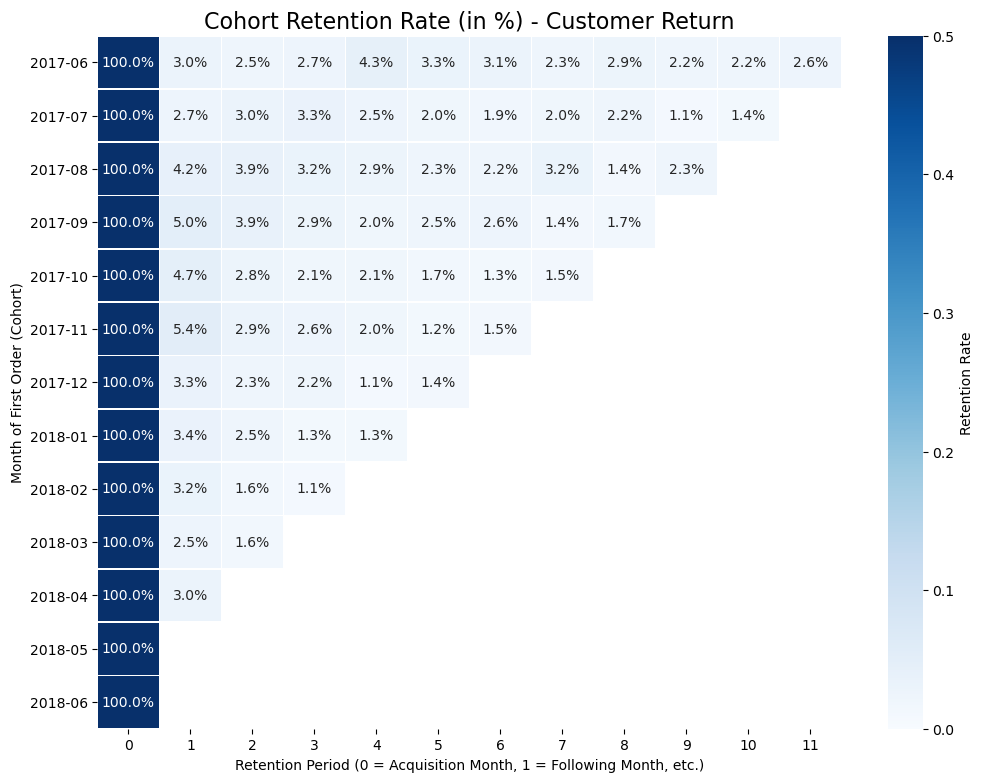

In [35]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
orders['order_month'] = orders['buy_ts'].dt.to_period('M')
orders['cohort'] = orders.groupby('uid')['order_month'].transform('min')
orders['cohort_period'] = (orders['order_month'] - orders['cohort']).apply(lambda x: x.n)

cohort_counts = (orders.groupby(['cohort', 'cohort_period'])['uid'].nunique().reset_index())
cohort_pivot = cohort_counts.pivot_table(index='cohort', columns='cohort_period', values='uid')
cohort_sizes = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_sizes, axis=0)

plt.figure(figsize=(12, 9))

sns.heatmap(retention_matrix,annot=True,fmt='.1%',cmap='Blues',vmin=0.0,vmax=0.5,linewidths=0.5,linecolor='white',cbar_kws={'label': 'Retention Rate'})

plt.title('Cohort Retention Rate (in %) - Customer Return', fontsize=16)
plt.ylabel('Month of First Order (Cohort)')
plt.xlabel('Retention Period (0 = Acquisition Month, 1 = Following Month, etc.)')
plt.yticks(rotation=0)
plt.show()

### 5.2 - Sales

#### 5.2.1 - Determine the conversion efficiency of users after registration by analyzing the time elapsed until the first purchase (Time-to-Buy).

In [36]:
first_visit=visits.groupby('uid')['start_ts'].min().reset_index()
first_buy=orders.groupby('uid')['buy_ts'].min().reset_index()
time_for_first_buy=pd.merge(first_visit,first_buy,how='inner',on='uid')
time_for_first_buy['time_to_first_buy']=(time_for_first_buy['buy_ts']-time_for_first_buy['start_ts'])

display(time_for_first_buy.describe())
display(time_for_first_buy.head())
print(time_for_first_buy.info())

# A df was created to calculate the time until the first purchase, using visits[‘starts_ts’] and orders[‘buy_ts’].
# The column time_to_first_buy was created by subtracting the two datetime columns.

,uid,time_to_first_buy
count,3.652300e+04,36523
mean,9.213152e+18,16 days 21:40:10.550064343
std,5.324792e+18,47 days 01:44:46.481416776
min,3.135781e+14,0 days 00:00:00
25%,4.615081e+18,0 days 00:04:00
50%,9.245161e+18,0 days 00:16:00
75%,1.383709e+19,2 days 00:17:00
max,1.844617e+19,363 days 07:04:00


,uid,start_ts,buy_ts,time_to_first_buy
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,106 days 23:02:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0 days 00:00:00
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,0 days 01:19:00
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,0 days 19:44:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0 days 00:00:00


<class 'pandas.core.frame.DataFrame'>
Int64Index: 36523 entries, 0 to 36522
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   uid                36523 non-null  uint64         
 1   start_ts           36523 non-null  datetime64[ns] 
 2   buy_ts             36523 non-null  datetime64[ns] 
 3   time_to_first_buy  36523 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), timedelta64[ns](1), uint64(1)
memory usage: 1.4 MB
None


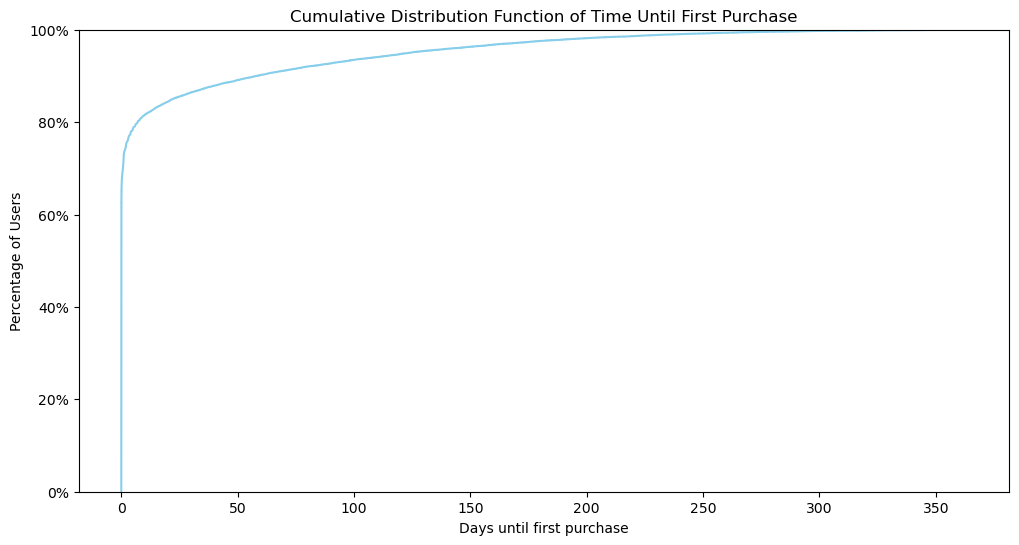

In [37]:
# Creating a graph to visualize time until first purchase
plt.figure(figsize=(12, 6))

ax = sns.ecdfplot(x=time_for_first_buy['time_to_first_buy'].dt.total_seconds() / (24 * 3600), color='skyblue')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0)) 
ax.set_title('Cumulative Distribution Function of Time Until First Purchase')
ax.set_xlabel('Days until first purchase')
ax.set_ylabel('Percentage of Users')

plt.show()

#### 5.2.2 - How many orders do customers place during a given period of time?

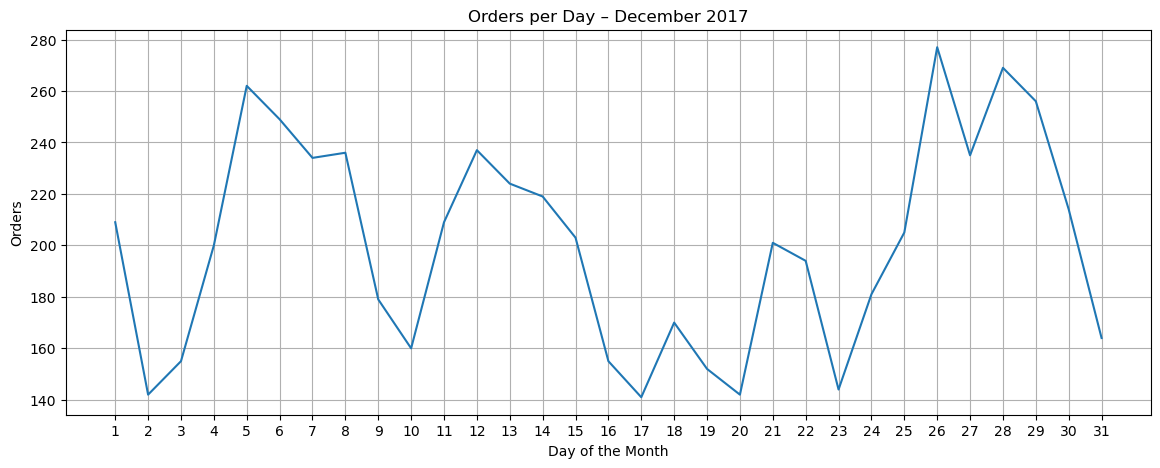

In [38]:
# Let's determine the number of orders placed in December 2017.
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
orders_dez = orders[(orders['buy_ts'] >= '2017-12-01') &(orders['buy_ts'] <  '2018-01-01')].copy()
orders_dez['day'] = orders_dez['buy_ts'].dt.day
daily = orders_dez.groupby('day')['uid'].count()

plt.figure(figsize=(14,5))
plt.plot(daily.index, daily.values)
plt.xticks(range(1, 32))
plt.xlabel('Day of the Month')
plt.ylabel('Orders')
plt.title('Orders per Day – December 2017')
plt.grid(True)
plt.show()

#### 5.2.3 - What is the average purchase volume?

In [39]:
first_orders = (orders.groupby("uid")["buy_ts"].min().reset_index().rename(columns={"buy_ts": "first_purchase"}))
first_orders["first_purchase_month"] = first_orders["first_purchase"].dt.to_period("M").astype(str)

user_source = visits[["uid", "source_id"]].drop_duplicates()
first_orders = first_orders.merge(user_source, on="uid", how="left")

orders["month"] = orders["buy_ts"].dt.to_period("M").astype(str)

revenue_df = (orders.groupby(["uid", "month"])["revenue"].sum().reset_index())
buyers = first_orders.merge(revenue_df, on="uid", how="left")


revenue_grouped_df = (buyers.groupby(["source_id", "month"])["revenue"].sum().reset_index())
costs["dt"] = pd.to_datetime(costs["dt"])
costs["month"] = costs["dt"].dt.to_period("M").astype(str)

costs_grouped_df = (costs.groupby(["source_id", "month"])["costs"].sum().reset_index())

report = costs_grouped_df.merge(revenue_grouped_df,how="left",on=["source_id", "month"])

report

,source_id,month,costs,revenue
0,1,2017-06,1125.61,2563.840088
1,1,2017-07,1072.88,3947.250000
2,1,2017-08,951.81,3325.640137
3,1,2017-09,1502.01,8193.419922
4,1,2017-10,2315.75,11466.139648
...,...,...,...,...
79,10,2018-01,614.35,466.839996
80,10,2018-02,480.88,671.890015
81,10,2018-03,526.41,1159.969971
82,10,2018-04,388.25,674.070007


#### 5.2.4 - How much money do they bring to the company (LTV)?

In [40]:
first_orders_df = orders.groupby('uid')['buy_ts'].min().reset_index()
first_orders_df.columns = ['uid', 'first_order']

orders = pd.merge(orders, first_orders_df, on='uid', how='left')

orders['first_order'] = orders['first_order'].dt.date
orders['first_order_month'] = pd.to_datetime(orders['first_order']).dt.to_period('M')
orders['order_month'] = orders['buy_ts'].dt.to_period('M')
orders['age'] = orders['order_month'].astype('int64') - orders['first_order_month'].astype('int64')

cohort_sizes = orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']

orders = pd.merge(orders, cohort_sizes, on='first_order_month')
cohorts = orders.groupby(['first_order_month', 'age']).agg({'revenue': 'sum'}).reset_index()
report = cohorts.merge(cohort_sizes, on='first_order_month')

report['ltv'] = report['revenue'] / report['n_buyers']
report.head()

result = report.pivot_table(index='first_order_month',columns='age',values='ltv', aggfunc='mean').cumsum(axis=1)

result = result.fillna(0)

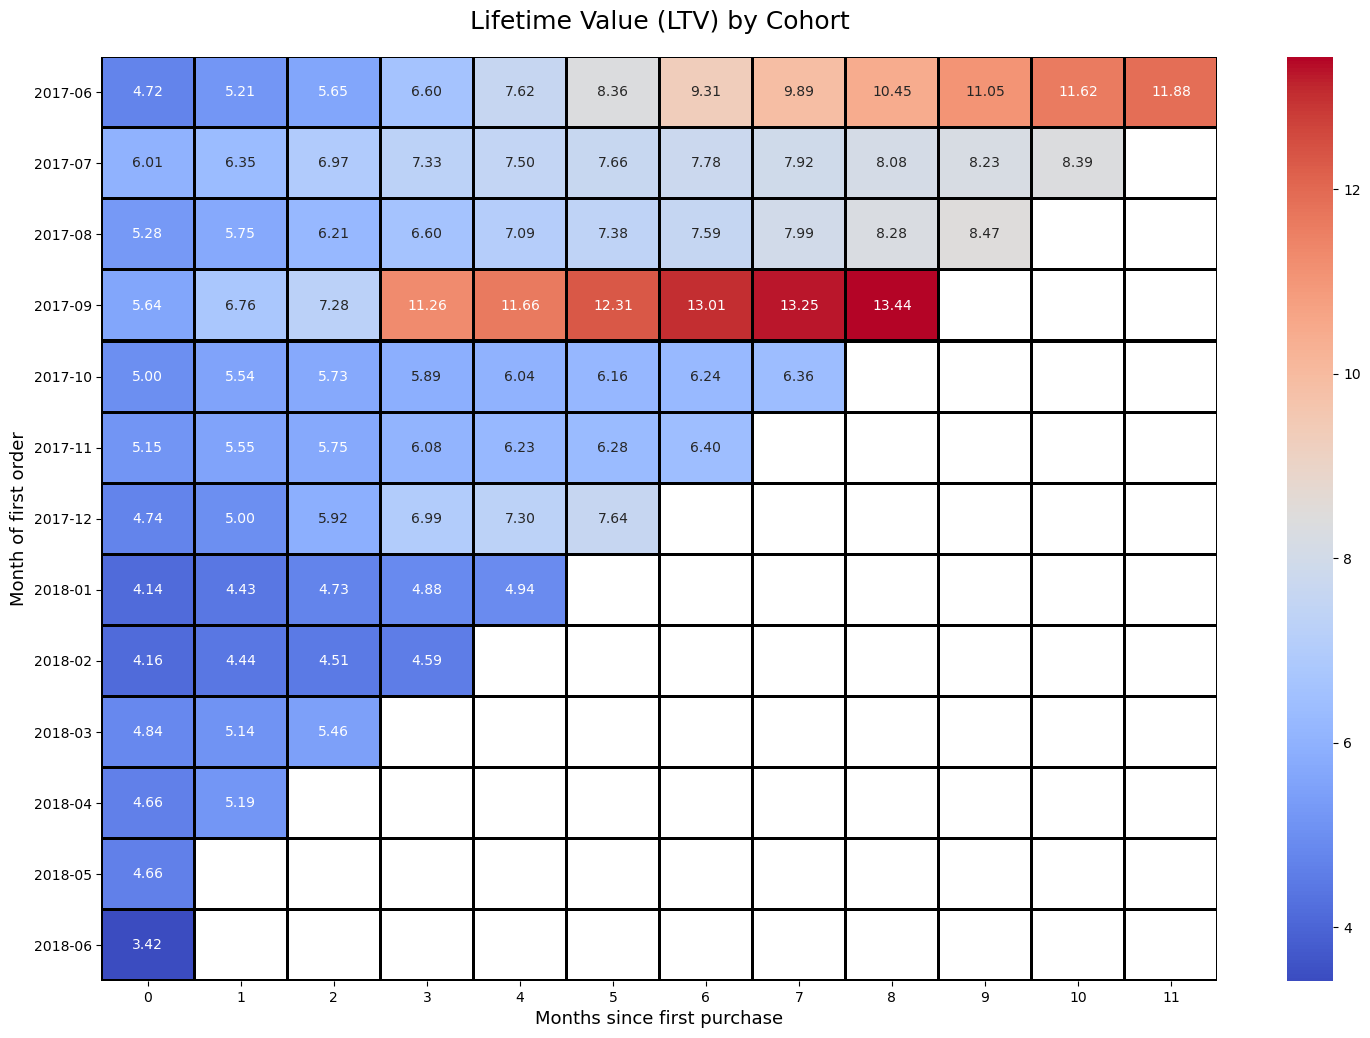

In [41]:
# Designing LTV graph by Cohort
plt.figure(figsize=(18, 12))

mask = result == 0

sns.heatmap(result,annot=True,fmt=".2f",cmap="coolwarm",linewidths=1.5,linecolor='black',mask=mask)

plt.title("Lifetime Value (LTV) by Cohort", fontsize=18, pad=20)
plt.xlabel("Months since first purchase", fontsize=13)
plt.ylabel("Month of first order", fontsize=13)
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.show()

### 5.3 - Marketing

#### 5.3.1 - How much money was spent? In total/over time

#### 5.3.1.1 - Total marketing expenditure

In [42]:
total_costs = costs['costs'].sum()
print("The total amount spent on marketing is US$", total_costs)


The total amount spent on marketing is US$ 329131.62


#### 5.3.1.2 - Total marketing expenditure over the months

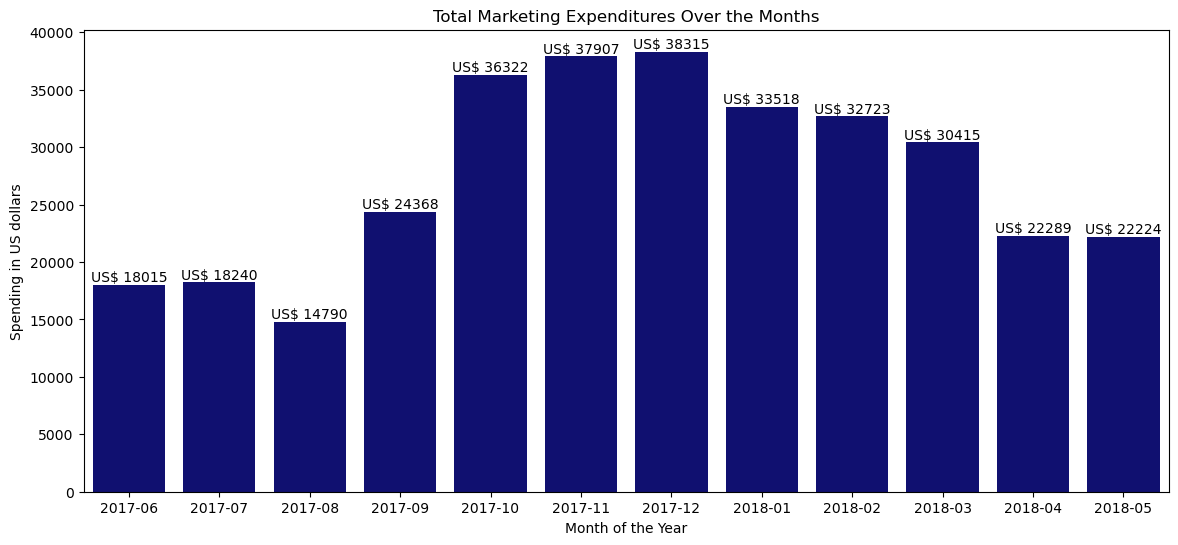

In [43]:
costs['month'] = costs['dt'].dt.to_period('M').astype(str)
gasto_por_mes = (costs.groupby('month', as_index=False)['costs'].sum())

plt.figure(figsize=(14, 6))
ax = sns.barplot(data=gasto_por_mes, x='month', y='costs', color='navy')
ax.set_title('Total Marketing Expenditures Over the Months')
ax.set_ylabel('Spending in US dollars')
ax.set_xlabel('Month of the Year')

for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2,bar.get_height(),f'US$ {int(bar.get_height())}',ha='center',va='bottom',fontsize=10)
plt.show()

#### 5.3.2 - How much did customer acquisition cost for each source?

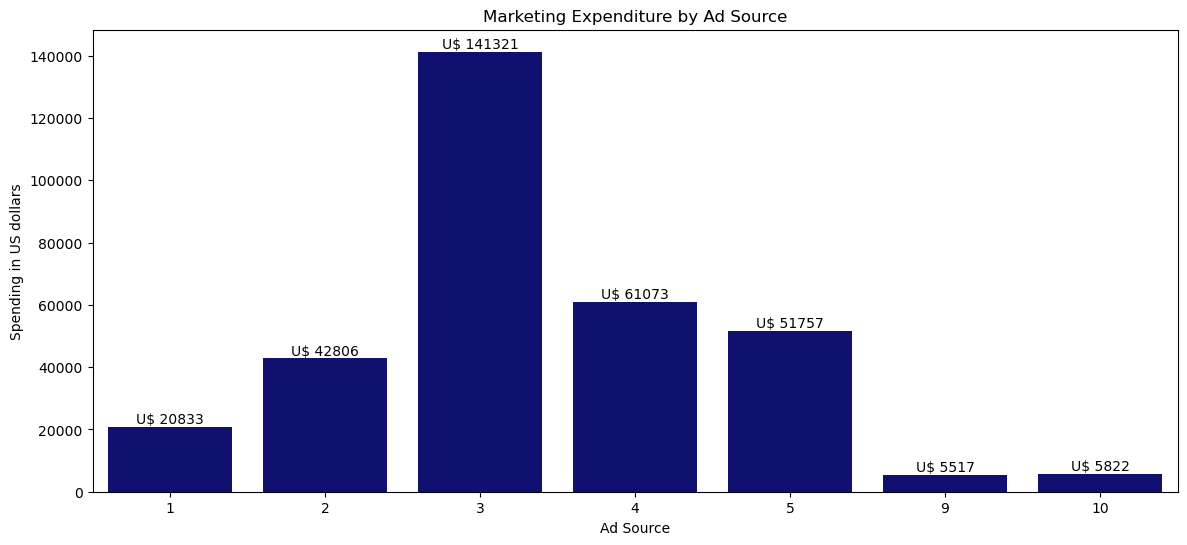

In [44]:
gasto_por_origem = (costs.groupby('source_id', as_index=False)['costs'].sum().sort_values('costs', ascending=False))

plt.figure(figsize=(14, 6))
ax = sns.barplot(data=gasto_por_origem, x='source_id', y='costs', color='navy')
ax.set_title('Marketing Expenditure by Ad Source')
ax.set_ylabel('Spending in US dollars')
ax.set_xlabel('Ad Source')

for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2,bar.get_height(),f'U$ {int(bar.get_height())}',ha='center',va='bottom',fontsize=10)

plt.show()

#### 5.3.3 - Were the investments worthwhile? (ROI)

In [45]:
cohort_clients = report.groupby('first_order_month')['n_buyers'].sum().reset_index()
costs['first_order_month'] = pd.to_datetime(costs['dt']).dt.to_period('M')
cohort_costs = costs.groupby('first_order_month')['costs'].sum().reset_index()
cohort_costs.columns = ['first_order_month', 'costs']

costs['first_order_month'] = pd.to_datetime(costs['dt']).dt.to_period('M')
cohort_cac = cohort_clients.merge(cohort_costs, on='first_order_month', how='left')
cohort_cac['cac'] = cohort_cac['costs'] / cohort_cac['n_buyers']

In [46]:
ltv_matrix = report.pivot_table(index='first_order_month',columns='age',values='ltv',aggfunc='mean').cumsum(axis=1)

ltv_long = ltv_matrix.reset_index().melt(id_vars='first_order_month', var_name='age', value_name='ltv')
ltv_long = ltv_long.merge(cohort_cac[['first_order_month','cac']], on='first_order_month', how='left')

ltv_long['romi'] = ltv_long['ltv'] / ltv_long['cac']
romi_matrix = ltv_long.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean').fillna(0).round(2)

romi_matrix = ltv_matrix.copy()
for month in romi_matrix.index:
    cac_value = cohort_cac.loc[cohort_cac['first_order_month'] == month, 'cac'].values[0]
    romi_matrix.loc[month] = romi_matrix.loc[month] / cac_value

romi_matrix = romi_matrix.round(2)

In [47]:
romi_matrix.head()

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,6.37,7.02,7.61,8.90,10.27,11.27,12.55,13.33,14.08,14.89,15.66,16.01
2017-07,6.97,7.36,8.08,8.50,8.70,8.88,9.02,9.19,9.37,9.55,9.73,NaN
2017-08,4.89,5.32,5.75,6.11,6.57,6.83,7.03,7.40,7.67,7.85,NaN,NaN
2017-09,5.38,6.45,6.94,10.73,11.11,11.73,12.40,12.63,12.81,NaN,NaN,NaN
2017-10,4.78,5.30,5.48,5.63,5.77,5.89,5.97,6.08,NaN,NaN,NaN,NaN


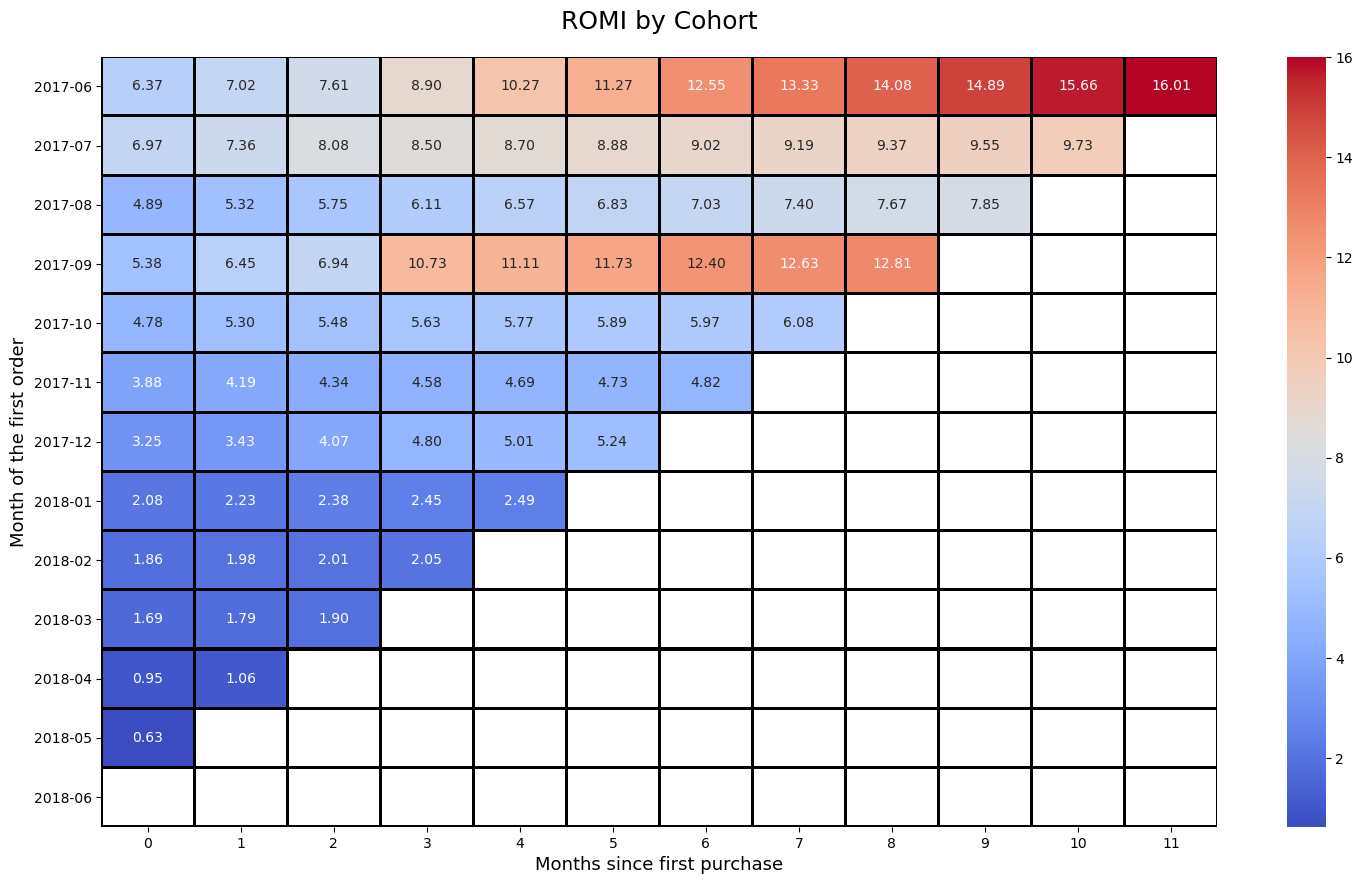

In [48]:
plt.figure(figsize=(18,10))

sns.heatmap(romi_matrix,annot=True,fmt=".2f",cmap="coolwarm",linewidths=1.5,linecolor='black')

plt.title("ROMI by Cohort", fontsize=18, pad=20)
plt.xlabel("Months since first purchase", fontsize=13)
plt.ylabel("Month of the first order", fontsize=13)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

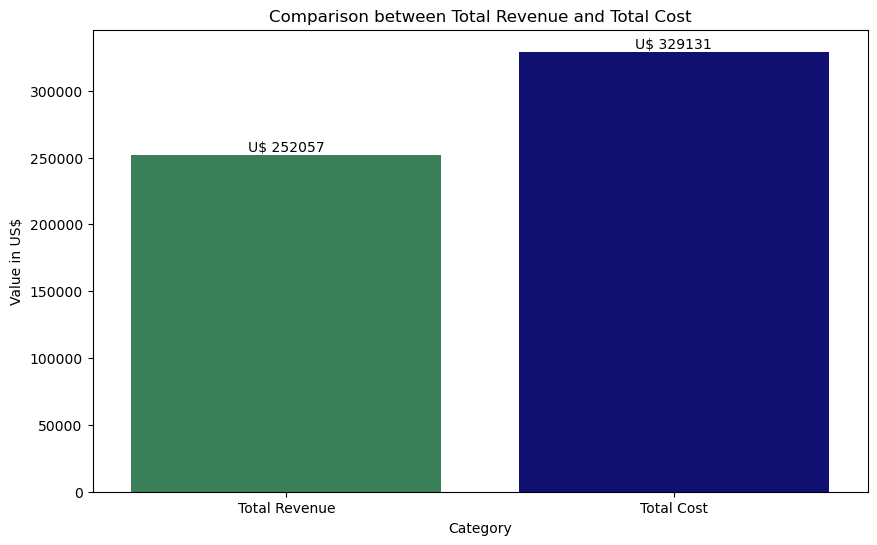

In [49]:
# Let's calculate the total revenue and total cost, then display a bar chart comparing the two values.

total_revenue = orders['revenue'].sum()
total_costs = costs['costs'].sum()
plt.figure(figsize=(10, 6))

cores = ['seagreen', 'navy']
ax = sns.barplot(x=['Total Revenue', 'Total Cost'], y=[total_revenue, total_costs], palette=cores)
ax.set_title('Comparison between Total Revenue and Total Cost')
ax.set_ylabel('Value in US$')
ax.set_xlabel('Category')

for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2,bar.get_height(),f'U$ {int(bar.get_height())}',ha='center',va='bottom',fontsize=10)

plt.show()

In [50]:
# Calculating the overall ROI
overall_roi = (total_revenue - total_costs) / total_costs * 100
print(f'The overall ROI is {overall_roi:.2f}%')

The overall ROI is -23.42%


## 6 - Conclusion

The performance analysis of **Y.Afisha's** marketing, focused on the relationship between revenue (`/datasets/orders_log_us.csv`), costs (`/datasets/costs_us.csv`), and visits (`/datasets/visits_log_us.csv`), reveals an urgent need for strategic optimization to ensure profitability.

### 🎯 Overall Performance

The most critical performance indicator is the **Overall Return on Investment (ROI), which was $\mathbf{-23.4\%}$**.

This result indicates that, during the analyzed period, the company **spent more on marketing than it managed to generate in revenue**. In other words, for every dollar invested in advertising, the company recovered only approximately US\$ 0.77, resulting in a loss from customer acquisition.

### 🔍 Detailed Analysis (LTV, CAC, and ROI by Source)

The detailed performance breakdown by traffic source (`Source Id`) reveals the origin of the problem and points the way to a solution:

1.  **Profitable Sources (Positive ROI):** Some specific sources demonstrated a **Positive ROI** due to a good balance between Customer Acquisition Cost (CAC) and Customer Lifetime Value (LTV).
    * **Best Case:** **Source 1** ($ROI$ of $+\$0.49$) should be the **priority for investment**, as it brings in customers who pay for themselves and generate profit, making it the most efficient channel overall.
2.  **Inefficient Sources (Negative ROI):** The majority of sources contribute negatively to the overall result, either by having an **excessively high CAC** or by acquiring customers with a **very low LTV**.
    * **Worst Case:** **Source 3** ($ROI$ of $-\$0.61$) is draining the marketing budget. Its **CAC ($\$2.14$)** is far greater than its **Total LTV ($\$0.82$)**, indicating a loss of approximately $\$1.32$ per acquired customer.

The LTV trend shows that customers in older cohorts become more valuable over time. However, the high initial acquisition cost in inefficient channels, such as **Source 3** and **Source 4** ($ROI = -0.07$), is overshadowing this long-term potential and resulting in a negative overall ROI.

---

### 💡 Recommendations

To reverse the negative ROI and seek sustainable growth, the following actions are recommended:

* **1. Immediately Reallocate the Budget:** Cut or drastically reduce investment in all traffic sources with negative or near-zero ROI (**Sources 3, 4, 10**). Transfer 100% of this budget to the **sources that demonstrably generate a positive ROI (Sources 1, 2, 9, 5)**, prioritizing those with the highest ROI.
* **2. Focus on Retention:** Develop retention campaigns (email marketing, promotions) to increase purchase frequency and average order value, elevating the **LTV** of customers across all cohorts.
* **3. Channel Optimization:** For sources with marginally positive ROI (e.g., Source 5, $ROI$ of $0.02$), conduct A/B tests and conversion optimizations to improve efficiency and increase the ROI to more sustainable levels.